# Homework (hw01) Instructions

# .ipynb Instructions

#### Activating virtual environment
1. Go to your **terminal** (PowerShell for Windows and Terminal.app for macOS) & move (cd) into your project directory (**workspace/introdsm**)
   1. The lab computers can be inconsistent in the virtual environment and package installation.
   2. Bring your own device (BYOD) is strongly encouraged. 
2. Activate your virtual environment:
   1. For macOS, Enter "source .venv/bin/activate" 
   2. For Windows, Enter "./.venv/Scripts/activate" 
   3. You should see the ".venv" prefix at your terminal prompt when the virtual environment is activated.
3. Launch Jupyter Notebook by entering "jupyter notebook" at the command line.
4. When you are done, deactivate the virtual environment by entering "deactivate".

#### Installing packages: otter-grader & datascience
1. Ideally, you should install packages using a terminal:
   1. In a terminal, activate your virtual machine.
   2. Enter "pip install <i>package_name</i>" to install module/package/ibrary. 
2. To install packages in Jupyter Notebook, for example:   
   1. type **```%pip install datascience```** and hit Enter key (this will take a while, like minutes)
   2. type **```%pip install otter-grader```** and Enter key. 
3. Comment out the installation line after installation is done. 

In [2]:
########## Install required modules here datascience, otter-grade ##### 
########## You may uncomment and run the following installatio none-by-one
# %pip install datascience
# %pip install otter-grader
########## Remove or comment out (using #) the installation commands after done #####
########## You may see many lines when installing
########## When installation is done, you will see a message at the very end of the lines: "Note: you may need to restart the kernel to use updated packages."
########## Go to Kernal ==> Restart Kernal and Clear Outputs of All Cells

In [11]:
########## Initialize Grader: Checks Format ######
import otter
from datascience import *
import numpy as np
import ssl    ### this is for downloading the online books

context = ssl._create_unverified_context()
grader = otter.Notebook("hw01.ipynb")


# Homework 01 (CH01/02): Data Science and Causality

Please complete this notebook by filling in the cells provided. Before you begin, run the previous cell to load the provided tests.

**Recommended Readings:**

- [What is Data Science?](https://introdsm.org/chapters/01/what-is-data-science.html)
- [Causality and Experiments](https://introdsm.org/chapters/02/causality-and-experiments.html) 

**Attention:**
- You **must** provide your answer in the designated space.
- Do not re-assign variables in the notebooks! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!
- Most "tests" in this homework **test formats and data types of your answer**, not the **correctness of the answers**. When you see you are **100% passed**, it **doesn't mean your final grade will be 100%**.
- DO NOT directly share your answers with others
- Discussing problems with the course staff or with other students is encouraged.
- Academic honor is important. DO NOT cheat!
- Start early so that you have time to get help if you're stuck. Email/text the TA and the instructor and come to office hours and lead sessions. 

## 1. Scary Arithmetic

<!-- BEGIN QUESTION -->

**Question 1.1** An ad for ADT Security Systems says,

> "When you go on vacation, burglars go to work [...] According to FBI statistics, over 25% of home burglaries occur between Memorial Day to Labor Day."

Do the data in the ad support the claim that burglars are more likely to go to work during the time between Memorial Day to Labor Day? Please explain your answer. **(2 Points)**

**Note:** You can assume that "over 25%" means only slightly over. Had it been much over, say closer to 30%, then the marketers would have said so.

**Note:** Memorial Day is observed on the last Monday of May and Labor Day is observed on the first Monday of September.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## 2. Characters in Little Women


In lecture, we counted the number of times that the literary characters were named in each chapter of the classic book, [*Little Women*](https://introdsm.org/chapters/01/3/1/Literary_Characters.html?highlight=little%20women). In computer science, the word "character" also refers to a letter, digit, space, or punctuation mark; any single element of a text. The following code generates a scatter plot in which each dot corresponds to a chapter of *Little Women*. The horizontal position of a dot measures the number of periods in the chapter. The vertical position measures the total number of characters.

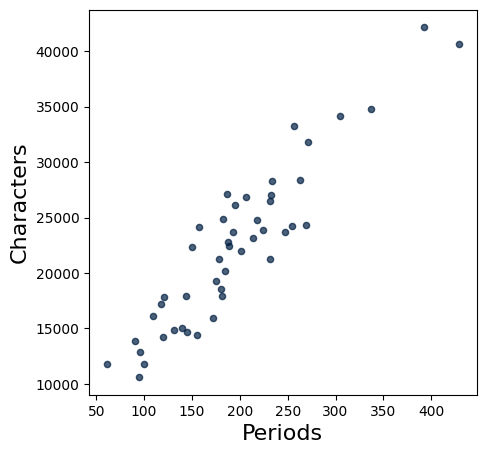

In [4]:
# Just run this cell.

# This cell contains code that hasn't yet been covered in the course,
# but you should be able to interpret the scatter plot it generates.

from datascience import *
from urllib.request import urlopen
import numpy as np
import ssl
context = ssl._create_unverified_context()
%matplotlib inline

little_women_url = 'https://www.introdsm.org/data/little_women.txt'
chapters = urlopen(little_women_url, context=context).read().decode().split('CHAPTER ')[1:]
text = Table().with_column('Chapters', chapters)
Table().with_columns(
    'Periods',    np.char.count(chapters, '.'),
    'Characters', text.apply(len, 0)
    ).scatter(0)

**Question 1.** Around how many periods are there in the chapter with the most characters? Assign either 1, 2, 3, 4, or 5 to the name `characters_q1` below. **(2 Points)**

1. 250
2. 390
3. 440
4. 32,000
5. 40,000


**Note:** If you run into a `NameError: name 'grader' is not defined` error in the autograder cell below (and in any assignment), please re-run the first cell at the very top of this notebook!

In [7]:
characters_q1 = ...

In [8]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.** Which of the following chapters has the most characters per period? Assign either 1, 2, or 3 to the name `characters_q2` below. **(2 Points)**

1. The chapter with about 60 periods
2. The chapter with about 350 periods
3. The chapter with about 440 periods


In [12]:
characters_q2 = ...

In [13]:
grader.check("q2_2")

q2_2 results: All test cases passed!

## 3. Read Two Books, Fast!


### A tiny program to download text from the web.
def read_url(url): 
    from urllib.request import urlopen 
    import re
    return re.sub('\\s+', ' ', urlopen(url, context = context).read().decode())

huck_finn_url = 'https://www.introdsm.org/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.introdsm.org/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [1]:
# Read two books, fast!
import datascience
from datascience import Table
import numpy
import ssl

context = ssl._create_unverified_context()

# A tiny program to download text from the web.
def read_url(url): 
    from urllib.request import urlopen 
    import re
    return re.sub('\\s+', ' ', urlopen(url, context = context).read().decode())

huck_finn_url = 'https://www.introdsm.org/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.introdsm.org/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [2]:
# Display the chapters of Huckleberry Finn in a table.


Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

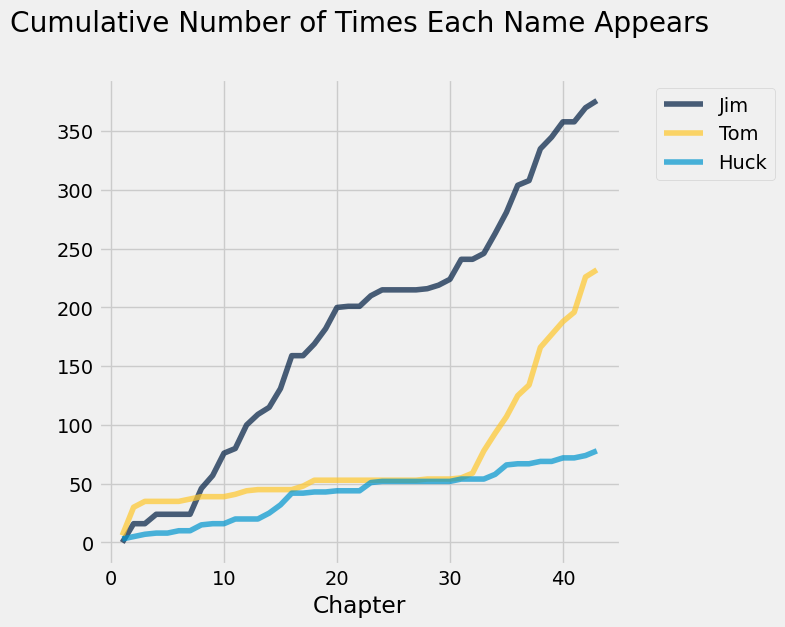

In [3]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom', np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Huck', np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

<!-- BEGIN QUESTION -->

**Question 3.1.** Why does the cumulative count of Huck's name so low when his name is in the title of the book? **(2 Points)**

_Type your answer here, replacing this text._

## 4. Nearsightedness Study

[Myopia](https://en.wikipedia.org/wiki/Myopia), or nearsightedness, results from a number of genetic and environmental factors. In 1999, Quinn et al studied the relation between myopia and ambient lighting at night (for example, from nightlights or room lights) during childhood. 
- Quinn, G. E., Shin, C. H., Maguire, M. G., & Stone, R. A. (1999). Myopia and ambient lighting at night. Nature, 399(6732), 113–114. [https://doi.org/10.1038/20094](https://doi.org/10.1038/20094) 


<!-- BEGIN QUESTION -->

**Question 4.1.** The data were gathered by the following procedure, reported in the study. "Between January and June 1998, parents of children aged 2-16 years [...] that were seen as outpatients in a university pediatric ophthalmology clinic completed a questionnaire on the child's light exposure both at present and before the age of 2 years." Was this study observational, or was it a controlled experiment? Explain. **(2 Points)**


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.2.** The study found that of the children who slept with a room light on before the age of 2, 55% were myopic. Of the children who slept with a night light on before the age of 2, 34% were myopic. Of the children who slept in the dark before the age of 2, 10% were myopic. The study concluded the following: "The prevalence of myopia [...] during childhood was strongly associated with ambient light exposure during sleep at night in the first two years after birth."

Do the data support this statement? Why or why not? You may interpret "strongly" in any reasonable qualitative way. **(2 Points)**


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.3.** On May 13, 1999, CNN reported the results of this study under the headline, "Night light may lead to nearsightedness." Does the original study claim that night light causes nearsightedness? **(2 Points)**

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.4.** The final paragraph of the CNN report said that "several eye specialists" had pointed out that the study should have accounted for heredity.

Myopia is passed down from parents to children. Myopic parents are more likely to have myopic children, and may also be more likely to leave lights on habitually (since the parents have poor vision). In what way does the knowledge of this possible genetic link affect how we interpret the data from the study? Explain. **(2 Points)**


_Type your answer here, replacing this text._

## 5. Submission

After you have completed the homework assignment, do the following:

1. Go to the notebook menu, choose Kernel ==> **Restart Kernel and Run All Cells**. 
2. **Save** the notebook file (File ==> Save Notebook)
3. **Change the filename** from hw01.ipynb to *hw01_FIRSTNAME_LASTNAME*.ipynb and **upload** to Canvas.